## Аналитика в авиакомпании
**Шаг 4. Аналитика средствами Python**
У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.
/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
model — модели самолета  
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
Скачать датасет
/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
city — городах
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года  
**Для этих двух наборов данных нужно:**
 - импортировать файлы;
 - изучить данные в них;
 - проверить типы данных на корректность;
 - выбрать топ-10 городов по количеству рейсов;
 - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
 - сделать выводы по каждому из графиков, пояснить результат.

## Описание данных

**База данных об авиаперевозках:**  
**Таблица airports — информация об аэропортах:**
 - airport_code — трёхбуквенный код аэропорта
 - airport_name — название аэропорта
 - city — город
 - timezone — временная зона  
**Таблица aircrafts — информация об самолётах:**
 - aircraft_code — код модели самолёта
 - model — модель самолёта
 - range — количество самолётов  
**Таблица tickets — информация о билетах:**
 - ticket_no — уникальный номер билета
 - passenger_id — персональный идентификатор пассажира
 - passenger_name — имя и фамилия пассажира  
**Таблица flights — информация о рейсах:**
 - flight_id — уникальный идентификатор рейса
 - departure_airport — аэропорт вылета
 - departure_time — дата и время вылета
 - arrival_airport — аэропорт прилёта
 - arrival_time — дата и время прилёта
 - aircraft_code – id самолёта  
**Таблица ticket_flights — стыковая таблица «рейсы-билеты»**
 - ticket_no — номер билета
 - flight_id — идентификатор рейса  
**Таблица festivals — информация о фестивалях**
 - festival_id — уникальный номер фестиваля
 - festival_date — дата проведения фестиваля
 - festival_city — город проведения фестиваля
 - festival_name — название фестиваля


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
models.head(10) 

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
city = pd.read_csv('/datasets/query_3.csv')
city.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [5]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


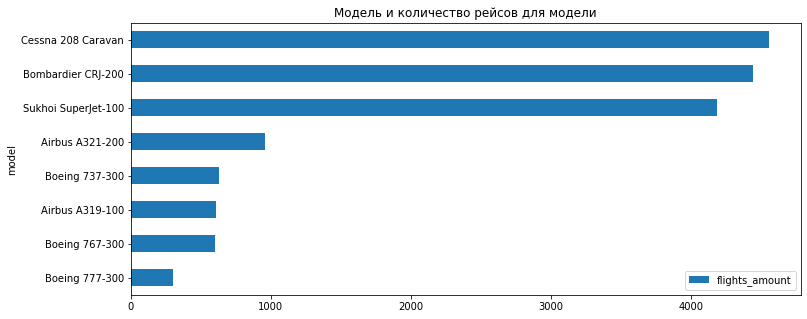

In [10]:
def plot_bar(df, column_gr, column_sum, title):
    df_plot = df.groupby(column_gr)[column_sum].sum().sort_values()
    ax = df_plot.plot(x='model', y='flights_amount',kind='barh', figsize=(12, 5)).legend()
    plt.title(title)
    plt.show()

plot_bar(models.head(10), 'model', 'flights_amount', 'Модель и количество рейсов для модели')

По количеству рейсов лидируют региональные самолеты с небольшим количеством пассажиров, выполняющие рейсы на короткие расстояния.

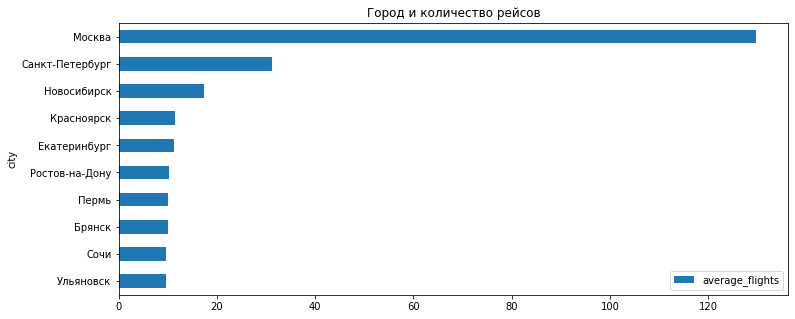

In [24]:
def plot_bar(df, column_gr, column_sum, title):
    df_plot = df.groupby(column_gr)[column_sum].sum().sort_values(ascending=False)
    ax = df_plot.head(10).sort_values().plot(x='city', y='average_flights', kind='barh', figsize=(12, 5)).legend()
    plt.title(title)
    plt.show()

plot_bar(city, 'city', 'average_flights', 'Город и количество рейсов')

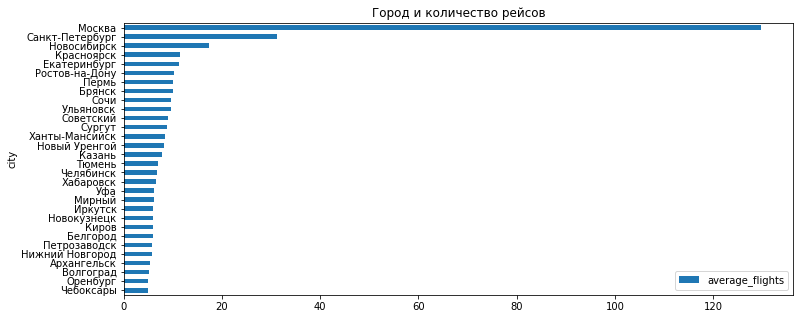

In [31]:
def plot_bar(df, column_gr, column_sum, title):
    df_plot = df.groupby(column_gr)[column_sum].sum().sort_values(ascending = False)
    ax = df_plot.head(30).sort_values().plot(x='model', y='flights_amount',kind='barh', figsize=(12, 5)).legend()
    plt.title(title)
    plt.show()

plot_bar(city, 'city', 'average_flights', 'Город и количество рейсов')

Москва, Питер - международные хабы, поэтому мы не можем ориентироваться на спрос билетов в этих городах, прогнозируя спрос на билеты во время фестивалей. Следует обратить внимание на региональных авиаперевозчиков, что происходит в период фестивалей и вне его на их рынке. Возможно, следует провести сравнение выборок, повышается ли спрос на билеты во время фестивалей и спрос в "мирное" время у региональных авиаперевозчиков. Например, сформулировать в качестве нулевой гипотезы, что спрос на билеты во время фестивалей не отличается от спроса на билеты в обычное время.